In [1]:
import gym
import random
import numpy as np
from collections import deque

import torch

from IPython import display
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from dqn_agent import Agent
from model import QNetwork

In [2]:
env = gym.make('LunarLander-v2')
o_dim = env.observation_space.shape[0]
a_dim = env.action_space.n
print('State shape: ', o_dim)
print('Number of actions: ', a_dim)

State shape:  8
Number of actions:  4


In [3]:
LR = 5e-4               # learning rate
LR_STEP_SIZE = 4
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 0.001             # for soft update of target parameters
BUFFER_SIZE = int(1e5)  # replay buffer size
UPDATE_EVERY = 1        
SEED = 1234

In [9]:
# parameters for training
NUM_EPISODES = 500
PRINT_EVERY = 50
TMAX = 1000

eps_start = 1.0
eps_end = 0.1
eps_decay = 0.95

### 1. DQN

In [11]:
agent = Agent(QNetwork, o_dim, a_dim, lr = LR, lr_step_size = LR_STEP_SIZE, 
              batch_size = BATCH_SIZE, gamma = GAMMA, tau = TAU, buffer_size = BUFFER_SIZE,
              update_every = UPDATE_EVERY, seed = SEED, algorithm = "dqn")
print(agent.algorithm)
print(agent.loss_fn)
print(agent.online_net)

dqn
SmoothL1Loss()
QNetwork(
  (main): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)


In [12]:
score_list = []
score_window = deque(maxlen = PRINT_EVERY)  
best_score = 0.0

eps = eps_start
for e in range(1, NUM_EPISODES+1):
    
    state = env.reset()
    score = 0
    for t in range(TMAX):
        action = agent.get_action(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
            
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    score_window.append(score)
    mean_score = np.mean(score_window)
    score_list.append([score, mean_score])
    
    print('\r\rEpisode {}\tsum of rewards {:8.2f}'.format(e, mean_score), end = "")
    
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}\tsum of rewards {:8.2f}'.format(e, mean_score))
        agent.scheduler.step()
        
        if mean_score >= best_score:
            print('\nmodel saved!')
            torch.save(agent.online_net.state_dict(), 'checkpoint.pth')
            best_score = mean_score

# load checkpoint
agent.online_net.load_state_dict(torch.load('checkpoint.pth'))
# load to cpu and save the best weights
torch.save(agent.online_net.cpu().state_dict(), "dqn_LunarLander.pth")

score1 = np.asarray(score_list).T

Episode 50	sum of rewards   -98.10
Episode 100	sum of rewards   -21.67
Episode 150	sum of rewards    20.57

model saved!
Episode 200	sum of rewards   151.01

model saved!
Episode 250	sum of rewards   128.76
Episode 300	sum of rewards   139.16
Episode 350	sum of rewards   182.15

model saved!
Episode 400	sum of rewards   198.60

model saved!
Episode 450	sum of rewards   217.34

model saved!
Episode 500	sum of rewards   222.67

model saved!


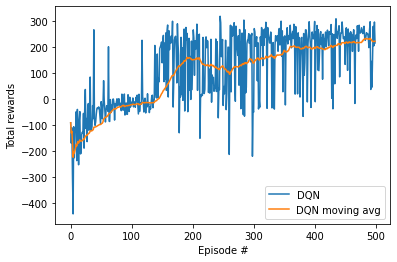

In [22]:
fig = plt.figure()
plt.plot(np.arange(score1.shape[1]), score1[0], label = "DQN")
plt.plot(np.arange(score1.shape[1]), score1[1], label = "DQN moving avg")
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### 2. double DQN

In [14]:
agent = Agent(QNetwork, o_dim, a_dim, lr = LR, lr_step_size = LR_STEP_SIZE, 
              batch_size = BATCH_SIZE, gamma = GAMMA, tau = TAU, buffer_size = BUFFER_SIZE,
              update_every = UPDATE_EVERY, seed = SEED, algorithm = "double dqn")
print(agent.algorithm)
print(agent.loss_fn)
agent.online_net

ddqn
SmoothL1Loss()


QNetwork(
  (main): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [15]:
score_list = []
score_window = deque(maxlen = PRINT_EVERY)  
best_score = 0.0

eps = eps_start
for e in range(1, NUM_EPISODES+1):
    
    state = env.reset()
    score = 0
    for t in range(TMAX):
        action = agent.get_action(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
            
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    score_window.append(score)
    mean_score = np.mean(score_window)
    score_list.append([score, mean_score])
    
    print('\r\rEpisode {}\tsum of rewards {:8.2f}'.format(e, mean_score), end = "")
    
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}\tsum of rewards {:8.2f}'.format(e, mean_score))
        agent.scheduler.step()
        
        if mean_score >= best_score:
            print('\nmodel saved!')
            torch.save(agent.online_net.state_dict(), 'checkpoint.pth')
            best_score = mean_score

# load checkpoint
agent.online_net.load_state_dict(torch.load('checkpoint.pth'))
# load to cpu and save the best weights
torch.save(agent.online_net.cpu().state_dict(), "ddqn_LunarLander.pth")

score2 = np.asarray(score_list).T

Episode 50	sum of rewards   -69.02
Episode 100	sum of rewards   156.14

model saved!
Episode 150	sum of rewards   214.99

model saved!
Episode 200	sum of rewards   206.45
Episode 250	sum of rewards   211.49
Episode 300	sum of rewards   176.68
Episode 350	sum of rewards   216.10

model saved!
Episode 400	sum of rewards   231.54

model saved!
Episode 450	sum of rewards   223.60
Episode 500	sum of rewards   208.95


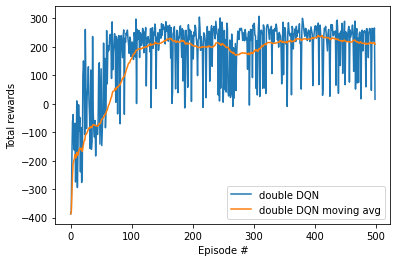

In [23]:
fig = plt.figure()
plt.plot(np.arange(score2.shape[1]), score2[0], label = "double DQN")
plt.plot(np.arange(score2.shape[1]), score2[1], label = "double DQN moving avg")
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.legend()
plt.show()

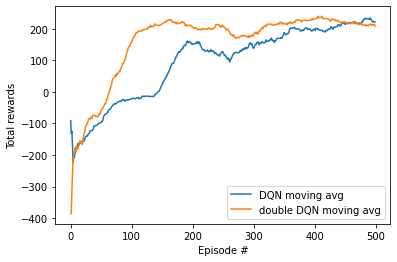

In [24]:
fig = plt.figure()
plt.plot(np.arange(score1.shape[1]), score1[1], label = "DQN moving avg")
plt.plot(np.arange(score2.shape[1]), score2[1], label = "double DQN moving avg")
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.legend()
plt.show()